In [2]:
from tools import tool
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#公司所属行业
com_industry_sql="""
    SELECT com_md5,com_industry FROM zhilian_company
"""
industry_data=pd.read_sql(com_industry_sql, tool.get_connnect())
industry_data.tail()

,com_md5,com_industry
84620,fffef0b0260cc3e64fbb5a46e4fc0694,快速消费品（食品/饮料/烟酒/日化）
84621,ffff349adef75ed6a9bffcc64059da16,互联网/电子商务
84622,ffff5e817d44e50ce6f5ea632d66cbea,家居/室内设计/装饰装潢
84623,ffff6ade889505b578d1b5ec5719937b,石油/石化/化工
84624,ffffd8d811735b8d797a8eeffb816016,基金/证券/期货/投资


In [3]:
#岗位薪资
job_salary_sql="""
	SELECT com_md5,salary_high,salary_low FROM zhilian_job
"""
salary_data=pd.read_sql(job_salary_sql,tool.get_connnect())
salary_data.tail()

,com_md5,salary_high,salary_low
474913,33433ccd928aa101005d84450c2e351b,6000.0,4001.0
474914,0949e6cf5caf6652209b64fcad1944af,6000.0,4001.0
474915,bde95cd7daea57bacc7d43981b6d3b11,12000.0,7000.0
474916,13c311febf9edf19f17154170adb62e9,20000.0,10000.0
474917,db8d4647b02e3ed7a958af0a95d84674,10000.0,5000.0


In [29]:
#合并数据,各行业平均薪资
merge_res=pd.merge(industry_data,salary_data,on='com_md5')
grouped=merge_res.groupby(['com_industry'])
res=grouped.mean().sort_values(by='salary_high',ascending=False).reset_index()
res.tail()

,com_industry,salary_high,salary_low
47,印刷/包装/造纸,7426.319012,4806.712137
48,贸易/进出口,7375.026165,4806.479778
49,礼品/玩具/工艺美术/收藏品/奢侈品,7328.366829,4858.082439
50,零售/批发,6783.241738,4359.309026
51,物流/仓储,6748.346163,4550.353590


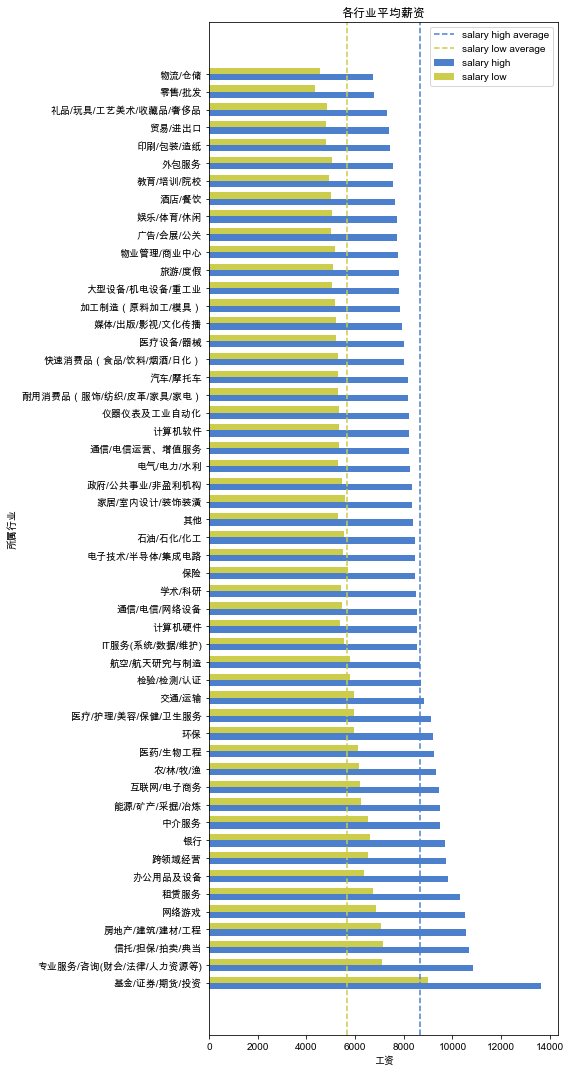

In [30]:
#可视化
fig,ax=plt.subplots(figsize=(8,15))
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
bar_width=0.35

rects1=ax.barh(res.index,res['salary_high'],bar_width,color=(0.3,0.5,0.8),label='salary high')
rects2=ax.barh(res.index+bar_width,res['salary_low'],bar_width,color=(0.8,0.8,0.3),label='salary low')

ax.set(xlabel='工资',ylabel='所属行业',title='各行业平均薪资')
ax.set_yticks(res.index+bar_width/2)
ax.set_yticklabels(res['com_industry'])
#添加平均线
ax.axvline(res['salary_high'].mean(),ls='--',color=(0.3,0.5,0.8),label='salary high average')
ax.axvline(res['salary_low'].mean(),ls='--',color=(0.8,0.8,0.3),label='salary low average')

ax.legend()

fig.tight_layout()
plt.show()

fig.savefig('{}.png'.format(ax.get_title()), transparent=False, dpi=80, bbox_inches="tight")